<a href="https://colab.research.google.com/github/Remonah-3/Github_Assignment/blob/master/Assignment_Iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.Series(iris.target, name='Species')

print(X.head())
print(y.head())

df = pd.concat([X, y], axis=1)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64
   sepal_length  sepal_width  petal_length  petal_width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [54]:
print(df.head(4))
print(df.describe())
print(df.isnull().sum())
print(df['Species'].value_counts())
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
       sepal_length  sepal_width  petal_length  petal_width     Species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000
sepal_length    0
sepal_wid

In [55]:
sepal_width_1 = df['sepal_width']
sepal_width_2 = df.iloc[:, 1]

petal_length_slice = df.loc[50:99, 'petal_length']
petal_width_filtered = df[df['petal_width'] > 0.2]['petal_width']

print(sepal_width_1.head())
print(petal_length_slice.head())
print(petal_width_filtered.head())

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64
50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal_length, dtype: float64
5     0.4
6     0.3
15    0.4
16    0.4
17    0.3
Name: petal_width, dtype: float64


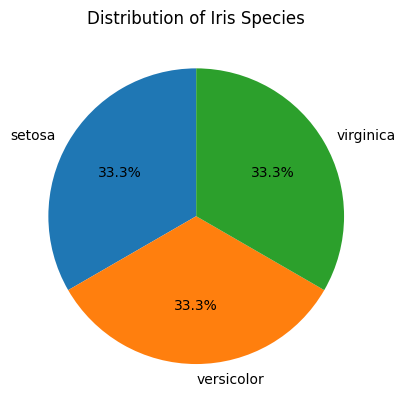

In [56]:
species_counts = df['Species'].value_counts()
plt.pie(species_counts, labels=['setosa','versicolor','virginica'], autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Iris Species")
plt.show()

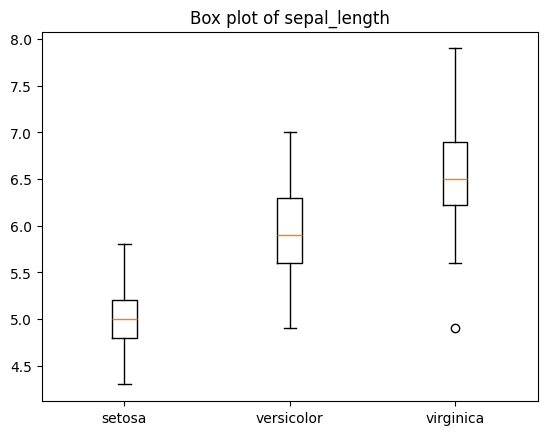

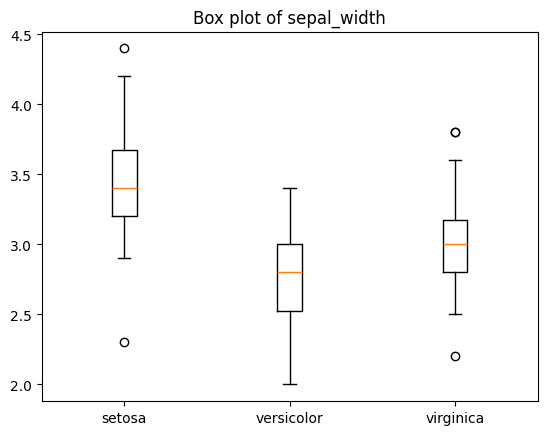

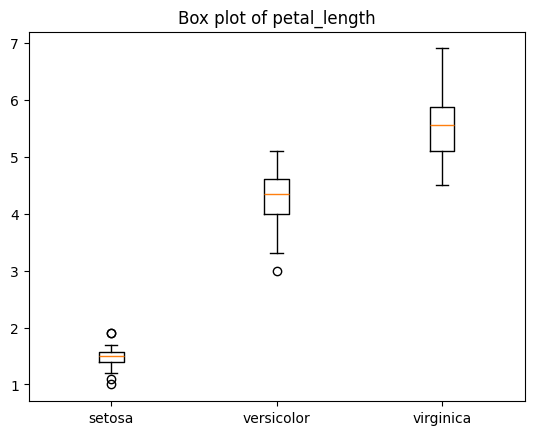

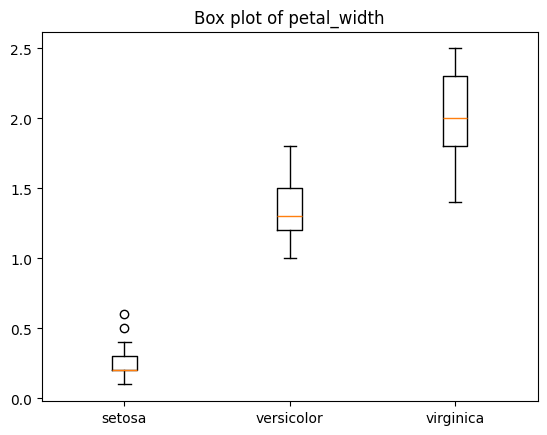

In [57]:
for feature in ['sepal_length','sepal_width','petal_length','petal_width']:
    plt.figure()
    for i in range(3):
        plt.boxplot(df[df['Species']==i][feature], positions=[i])
    plt.xticks(range(3), ['setosa','versicolor','virginica'])
    plt.title(f'Box plot of {feature}')
    plt.show()

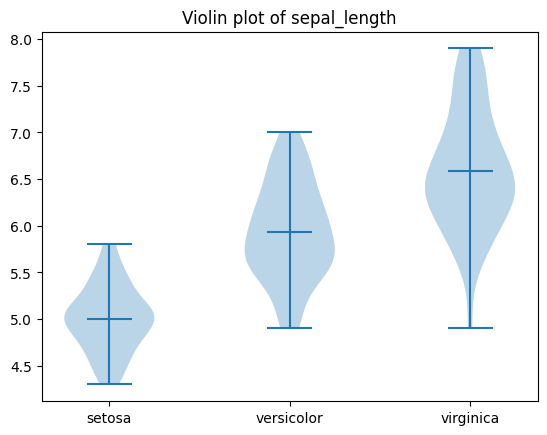

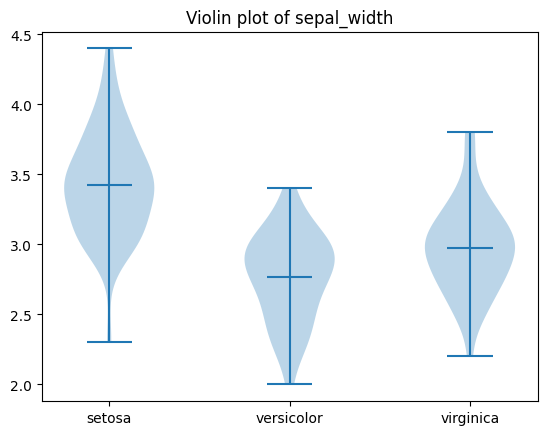

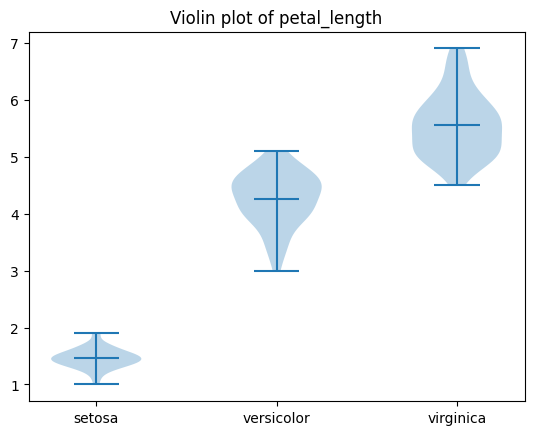

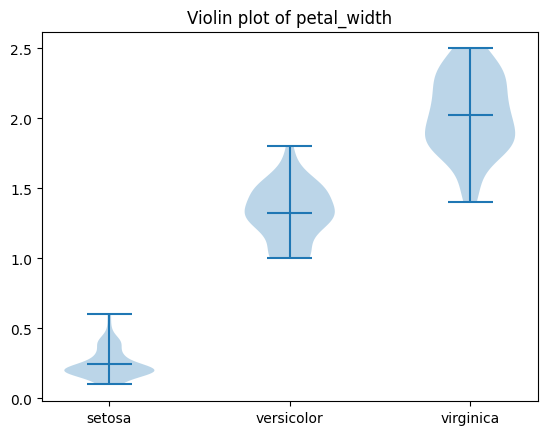

In [58]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
species_names = ['setosa','versicolor','virginica']

for feature in features:
    data = [df[df['Species']==i][feature] for i in range(3)]
    plt.figure()
    plt.violinplot(data, showmeans=True)
    plt.xticks(range(1, 4), species_names)
    plt.title(f'Violin plot of {feature}')
    plt.show()

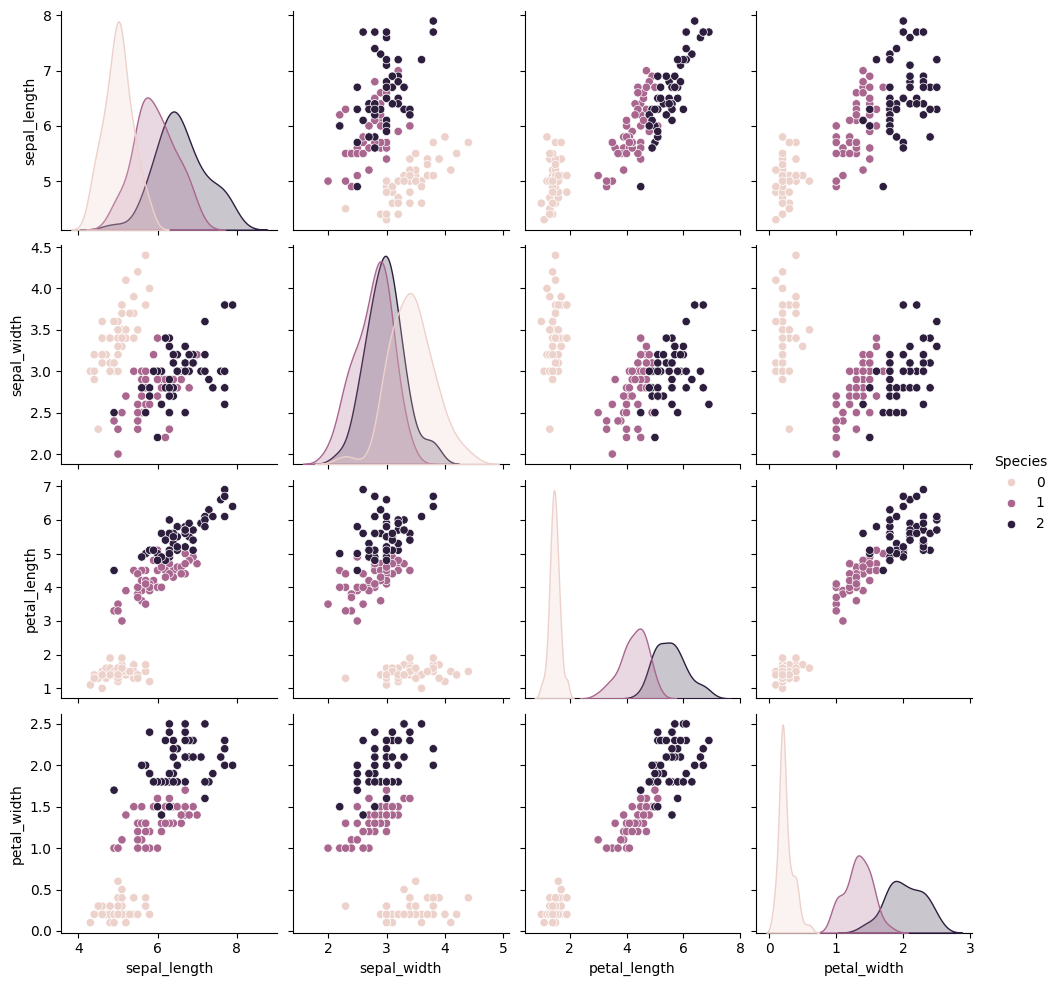

In [59]:
sns.pairplot(df, hue='Species')
plt.show()

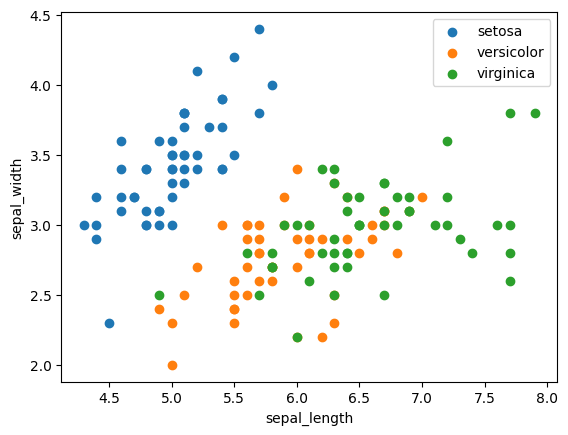

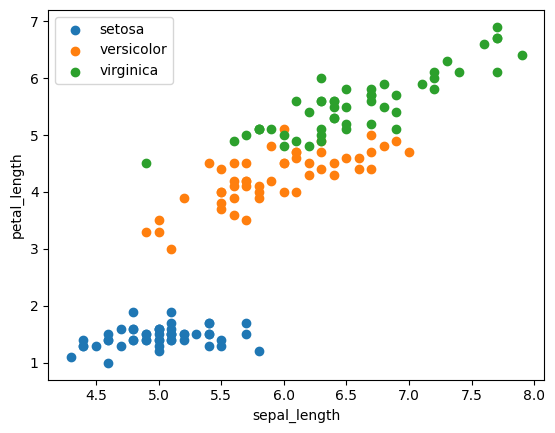

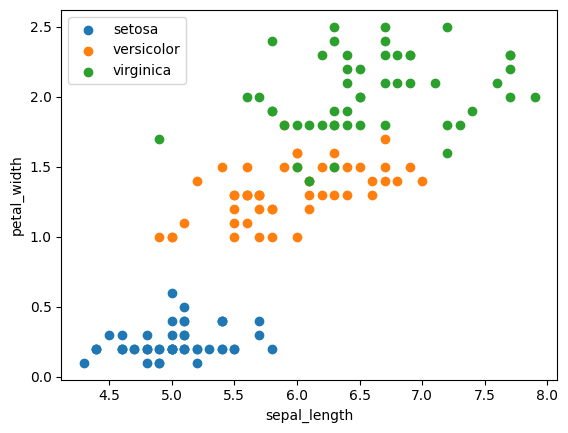

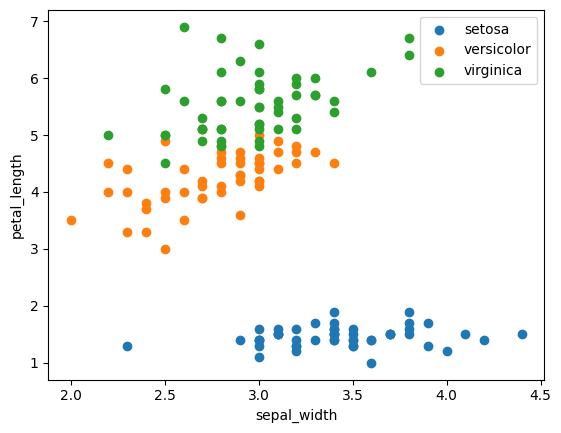

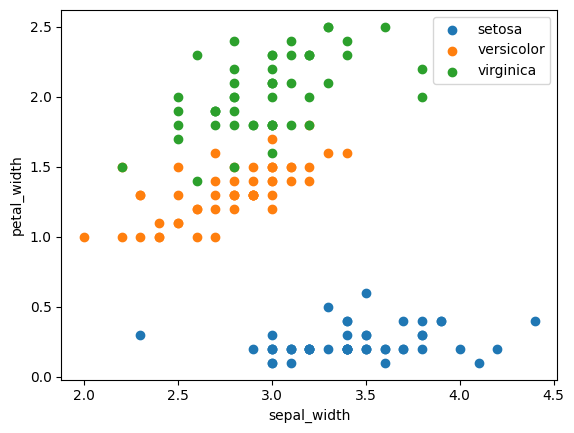

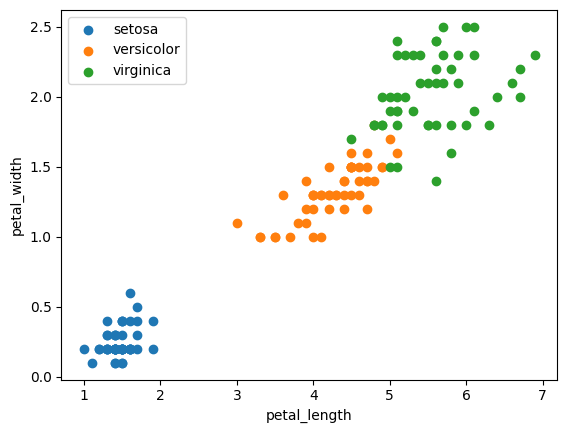

In [60]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
for i in range(4):
    for j in range(i+1, 4):
        plt.figure()
        for k, name in enumerate(['setosa','versicolor','virginica']):
            subset = df[df['Species']==k]
            plt.scatter(subset[features[i]], subset[features[j]], label=name)
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.legend()
        plt.show()

In [61]:
corr_matrix = df.iloc[:, :4].corr()
print(corr_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


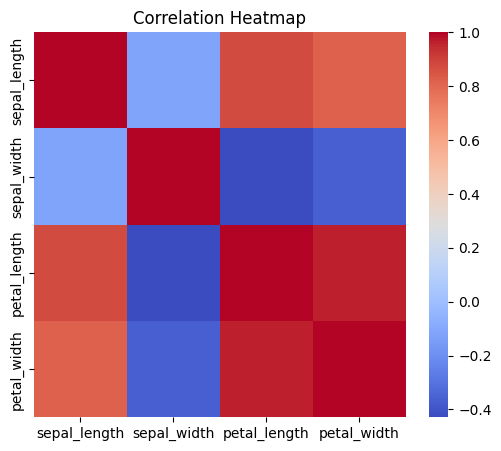

In [62]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

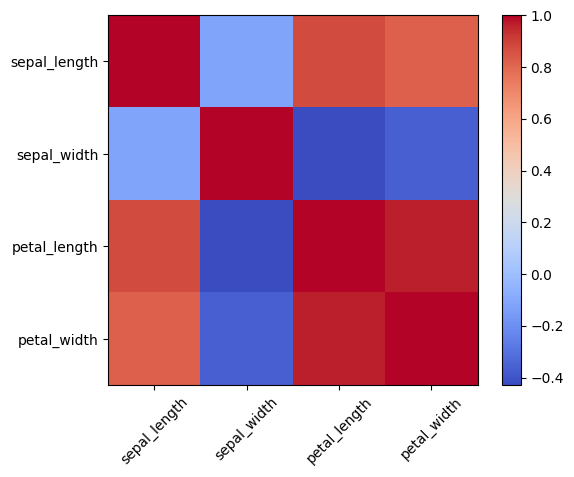

In [63]:
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(4), ['sepal_length','sepal_width','petal_length','petal_width'], rotation=45)
plt.yticks(range(4), ['sepal_length','sepal_width','petal_length','petal_width'])
plt.show()

The Iris dataset contains 150 samples divided equally among setosa, versicolor, and virginica.

The scatterplot matrix shows that petal length and petal width can clearly tell the species apart.